<a href="https://colab.research.google.com/github/musicjae/intro_to_python/blob/master/Pytorch/pytorch_studying(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 텐서

텐서란?  
> 다차원 배열을 처리하기 위한 데이터 구조  
- 32비트 유동소수점 torch.FloatTensor  
- 64비트 부호 있는 정수 torch.LongTensor

In [ ]:
import torch

t = torch.arange(0,10)

t2 = torch.zeros(10,10).to("cuda:0") # gpu에 전송

t3 = torch.randn(10,10)

print(t)
print(t2)
print(t3)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], device='cuda:0')
tensor([[ 0.2842,  0.6843, -1.7177, -0.7864,  0.6808, -1.3186, -0.7213, -1.4862,
         -2.2353,  0.4658],
        [ 0.5149,  0.8951,  0.6117, -0.4503, -0.1104, -0.7904,  1.0345, -0.9096,
         -2.4095, -1.6871],
        [-1.5486,  0.9370, -1.9980,  0.0925, -0.5293,  0.2303, -0.0672,  1.3765,
          0.8359,  0.6069],
        [-1.0473,  0.5839,  0.8885, -0.3020, -2.9406,  0.4367,  0.0744,  0.8414,
          1.3908,  0.0555],
       

## 1.1 텐서 변환

gpu 상의 텐서는 cpu 로 옮긴 뒤 변환해야 한다.

In [ ]:
t = torch.tensor([[1,2],[3,4]])
x = t.numpy()
print(x)
t = torch.tensor([[1,2],[3,4]], device = "cuda:0")
x = t.to("cpu").numpy
print('2',x)


[[1 2]
 [3 4]]
2 <built-in method numpy of Tensor object at 0x7f083b1323a8>


## 1.2 iNDEX 조작

In [ ]:
t = torch.tensor([[1,2,3],[3,4,5]])
print(t,t.shape)

print('\n\n',t[1,2]) # [세로, 가로]
print('\n\n',t[:,:2])
print('\n\n',t[:,[1,2]])

# 마스크 배열 사용, 3 보다 큰 부분만 선택; 마스크 배열? 각 요소가 진리값으로 설정된 배열 & 원 배열과 크기 동일
print('\n\n',t[t>3])

# [0,1] 위치에 100 을 대입
t[0,1]=100
print('\n\n',t)

tensor([[1, 2, 3],
        [3, 4, 5]]) torch.Size([2, 3])


 tensor(5)


 tensor([[1, 2],
        [3, 4]])


 tensor([[2, 3],
        [4, 5]])


 tensor([4, 5])


 tensor([[  1, 100,   3],
        [  3,   4,   5]])


## 1.3 연산

In [ ]:
m = torch.randn(10,10)
n = torch.randn(10)

inner_product = torch.dot(n,n)
m_v = torch.mv(m,n)
m_m=torch.mm(m,m)
print('[1]inner_product',inner_product,'\n\n[2]m_v',m_v,'\n\n[3]m_m',m_m)
# 특이값 분해

u,s,v = torch.svd(m)
print('\n\n[4]u,s,v',u,s,v)


[1]inner_product tensor(10.1560) 

[2]m_v tensor([ 2.6379,  3.6858,  2.9169, -2.6726, -1.6617, -2.7842, -6.8830,  2.0043,
        -0.9432, -0.0414]) 

[3]m_m tensor([[ 1.5670, -4.8697,  3.6080,  2.3891,  3.8516,  0.5617,  0.5037,  1.3982,
         10.1938,  7.9761],
        [ 1.6164,  0.1389,  1.2611,  2.6837,  2.6316, -2.8585,  0.2073,  2.4207,
          1.2710,  0.0363],
        [-1.2831,  0.2767, -2.4030, -2.9506, -2.4089,  4.3750, -1.0710, -1.8505,
          0.0873,  2.5389],
        [ 6.1893, -2.7930,  1.3737,  2.4081, -0.2641,  0.2796, -4.1899, -2.0623,
          0.1028,  0.3312],
        [ 1.3265, -2.2965, -0.5745, -0.1240,  0.4706,  0.1106, -2.1354, -3.4840,
         -2.4797,  0.4190],
        [-0.1583, -2.6622,  1.2863,  2.9619,  2.6784,  1.9270, -3.2176,  2.5999,
          0.3200,  1.8253],
        [ 5.1972, -2.0838,  1.7727,  3.6734, -6.9328, -4.5619,  0.8094, -0.4293,
         -1.8279, -6.4055],
        [-2.4270, -0.2587, -1.7667, -3.7473, -0.3119, -1.1093,  2.8898, -2.1571

# 2. 자동 미분




requires_grad를 True로 설정하면 자동 미분 기능이 활성화된다. backward 메서드 호출 시, 그래프로부터 자동으로 미분을 계산한다.

# 3. 최대 우도 추정 Maximal Liklihood Estimation

## 3.1 확률 모델  
  
변수 x가 파라미터 $\theta$를 지니는 확률 분포 $P(x|\theta)$로부터 생성되는 모델 :$$x\sim P(x|\theta)$$  
  

  
- x 가 **연속** **변수**인 경우 위 모델은 정규 분포가 될 수 있다.  
- 이산 변수 $[0,1]$인 경우에, 위 모델은 Bernoulli Distribution이 될 수 있다:  $B(x|p) = p^x(1-p)^{1-x}$


## 3.2 최대 우도 추정 MLE  
  
- **우도liklihood:** 서로 독립된  N 개의 데이터 $X = (x0,x1,...)$이 주어졌을 때, 각 데이터의 확률 함수의 곱 $L(\theta)\ =\ \prod_n P(x_n|\theta)$이라 할 때, 이 $\theta$가 바로 가능 정도인 **우도**이다.  
  
- **MLE**: 우도를 최대로 만드는 파라미터 $\theta$ 를 구하는 것을 MLE라 한다.  
  
- log 우도: 계산이 쉽다는 이유로 사용된다: $logL(\theta)$

# 4. SGD

참고:  
    
[1] https://everyday-deeplearning.tistory.com/entry/SGD-Stochastic-Gradient-Descent-%ED%99%95%EB%A5%A0%EC%A0%81-%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95  
[2] https://go-hard.tistory.com/11


# 5. 선형 회귀 모델

##5.1 소개  
  
여러 변수로부터 하나 또는 여러 개의 값을 예측하는 기법  
  
- $y$(예측값) $=$ $a$(회귀계수)$*$$x$$+$b$+$ $\epsilon$ (정규 분포의 오차항)

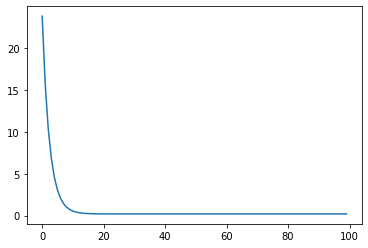

In [ ]:
# 선형 회귀 모델의 파라미터를 추정해보자
import torch
from matplotlib import pyplot as plt

w_true = torch.Tensor([1,2,3]) # true 개수

# (1) X의 최초 차원에 1을 추가

X = torch.cat([torch.ones(100,1), torch.randn(100,2)],1)

# (2) 참의 개수 * X

y = torch.mv(X, w_true) + torch.randn(100)*0.5 # last term 오차항

# (3) 경사 하강으로 최적화 하기 위해, 가중치 초기화

w = torch.randn(3, requires_grad=True)

gamma= 0.1

# (4) 손실 함수

losses = []

# (5) 학습

for epoc in range(100):

    w.grad=None # 전회 경사값 초기화
    y_pred = torch.mv(X,w) # 선형 모델로 y 값 예측/ 여기서 w는 기울기(회귀계수)

    # (5-2) MSE loss 계산

    loss = torch.mean((y - y_pred)**2)
    loss.backward()

    # (5-3) 기울기 갱신 (data만 기울기 갱신)
    w.data = w.data - gamma*w.grad.data 

    #(5-4)LOSS 기록

    losses.append(loss.item())

#(6) 그래프 그리기

%matplotlib inline
plt.plot(losses)

## 5.2 선형 회귀 모델을 모듈을 이용하여 만들기  
  
- torch.nn: 모델 구축  
- torch.optim: 최적화 

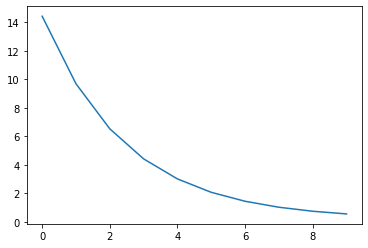

In [ ]:
# 5.1 에서 작성한 코드를 더 단순화 해보자

from torch import nn, optim
from matplotlib import pyplot as plt

net = nn.Linear(in_features=3,out_features=1,bias=False)# 선형층 작성
                                                        # 절편은 회귀 계수에 포함하므로, 입력 차원 3
                                                        # 절편은 False

w_true = torch.Tensor([1,2,3]) # true 개수
X = torch.cat([torch.ones(100,1), torch.randn(100,2)],1)
y = torch.mv(X, w_true) + torch.randn(100)*0.5 # last term 오차항


# SGD 사용

optimizer = optim.SGD(net.parameters(),lr=0.1)

# MSE loss 클래스

loss_fn = nn.MSELoss()

##### 최적화 루프 #####

losses=[]

for epoc in range(10):

    optimizer.zero_grad() # 전회의 grad 초기화
    y_pred = net(X) # y 예측값 계산
    loss = loss_fn(y_pred.view_as(y),y) # MSE loss 계산; y_pred는 (n,1)과 동일한 shape을 가지니까, (n,)으로 변경

    loss.backward() # loss의 w를 사용한 미분 계산
    optimizer.step() # 경사 갱신

    losses.append(loss.item())


%matplotlib inline
plt.plot(losses)

# 6. 로지스틱 회귀 (분류를 위한 선형 모델)



# 7. MLP 구축과 학습

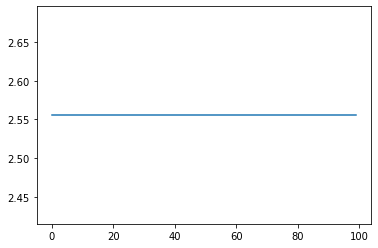

In [ ]:
import torch
from torch import nn, optim
from sklearn.datasets import load_digits
from torch.utils.data import TensorDataset, DataLoader
from matplotlib import pyplot as plt
digits = load_digits()

X = digits.data
Y = digits.target


## 순전파
net = nn.Sequential(
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10)
)

# ndarray -> tensor

X = torch.tensor(X, dtype = torch.float32)
Y = torch.tensor(Y, dtype = torch.int64)

# cross entropy

loss_fn = nn.CrossEntropyLoss()

#Adam

optimizer = optim.Adam(net.parameters())

# losses

losses=[]

#training

for epoc in range(100):

    optimizer.zero_grad()
    y_pred = net(X)

    # loss, w 사용한 미분 계산

    loss = loss_fn(y_pred, Y)
    loss.backward

    # update

    optimizer.step()

    #record

    losses.append(loss.item())

%matplotlib inline
plt.plot(losses)


## 7.2 학습 효율화

### 드롭아웃

오버피팅을 방지하기 위해 정규화 중 하나인 **드롭아웃**을 사용해보자. 이것은 몇 개의 노드(변수의 차원)을 랜덤으로 선택해서 의도적으로 그 노드를 사용하지 않는 방법이다. 이것은 훈련 시에만 적용

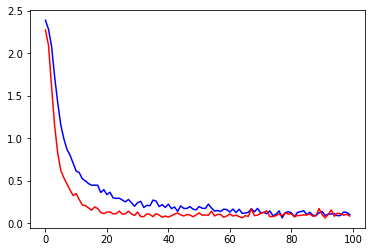

In [ ]:
import torch
from torch import nn, optim
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from matplotlib import pyplot as plt

X = digits.data
Y = digits.target
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.int64)

k = 100 
net = nn.Sequential(
    nn.Linear(64,k),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(k,k),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(k,k),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(k,k),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(k,10)
)

loss_fn = nn.CrossEntropyLoss()

optimizer = optim.Adam(net.parameters())

#dataloader

ds = TensorDataset(X_train, Y_train)
loader = DataLoader(ds, batch_size=32, shuffle=True)

train_losses=[]
test_losses=[]

for epoch in range(100):

    running_loss = 0.0

    # set training mode

    net.train()
    for i, (xx, yy) in enumerate(loader):

        y_pred = net(xx)
        loss = loss_fn(y_pred, yy)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_losses.append(running_loss/i)

    # set eval mode

    net.eval()

    y_pred=net(X_test)
    test_loss = loss_fn(y_pred, Y_test)
    test_losses.append(test_loss.item())

%matplotlib inline
plt.plot(train_losses,'b')
plt.plot(test_losses,'r')


### 배치 정규화  
  
SGD 시 각 변수의 차원이 동일한 범위의 값을 갖는 것은 중요하다. 심층 신경망에서는 층이 늘어날수록 각 층마다 출력하는 데이터의 분포가 다르다 (바뀌기 때문) 따라서 데이터의 정규화만으로는 부족하다. 그래서 우리는 배치 정규화를 도입한다. 각 층의 학습 마다 달라지는 파라미터의 불안정성을 줄이기 위해서이다.

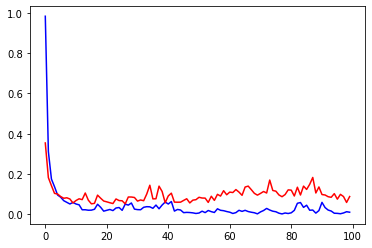

In [ ]:
import torch
from torch import nn, optim
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from matplotlib import pyplot as plt

X = digits.data
Y = digits.target
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.int64)

k = 100 

net = nn.Sequential(
    nn.Linear(64,k),
    nn.ReLU(),
    nn.BatchNorm1d(k),
    nn.Linear(k,k),
    nn.ReLU(),
    nn.BatchNorm1d(k),
    nn.Linear(k,k),
    nn.ReLU(),
    nn.BatchNorm1d(k),
    nn.Linear(k,k),
    nn.ReLU(),
    nn.BatchNorm1d(k),
    nn.Linear(k,10)
)

loss_fn = nn.CrossEntropyLoss()

optimizer = optim.Adam(net.parameters())

#dataloader

ds = TensorDataset(X_train, Y_train)
loader = DataLoader(ds, batch_size=32, shuffle=True)

train_losses=[]
test_losses=[]

for epoch in range(100):

    running_loss = 0.0

    # set training mode

    net.train()
    for i, (xx, yy) in enumerate(loader):

        y_pred = net(xx)
        loss = loss_fn(y_pred, yy)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_losses.append(running_loss/i)

    # set eval mode

    net.eval()

    y_pred=net(X_test)
    test_loss = loss_fn(y_pred, Y_test)
    test_losses.append(test_loss.item())

%matplotlib inline
plt.plot(train_losses,'b')
plt.plot(test_losses,'r')

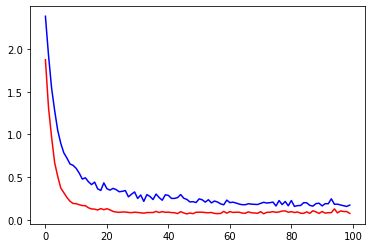

In [ ]:
# 배치 + 드롭아웃

import torch
from torch import nn, optim
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from matplotlib import pyplot as plt

X = digits.data
Y = digits.target
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.int64)

k = 100 

net = nn.Sequential(
    nn.Linear(64,k),
    nn.ReLU(),
    nn.BatchNorm1d(k),
    nn.Dropout(0.5),
    nn.Linear(k,k),
    nn.ReLU(),
    nn.BatchNorm1d(k),
    nn.Dropout(0.5),
    nn.Linear(k,k),
    nn.ReLU(),
    nn.BatchNorm1d(k),
    nn.Dropout(0.5),
    nn.Linear(k,k),
    nn.ReLU(),
    nn.BatchNorm1d(k),
    nn.Dropout(0.5),
    nn.Linear(k,10)
)

loss_fn = nn.CrossEntropyLoss()

optimizer = optim.Adam(net.parameters())

#dataloader

ds = TensorDataset(X_train, Y_train)
loader = DataLoader(ds, batch_size=32, shuffle=True)

train_losses=[]
test_losses=[]

for epoch in range(100):

    running_loss = 0.0

    # set training mode

    net.train()
    for i, (xx, yy) in enumerate(loader):

        y_pred = net(xx)
        loss = loss_fn(y_pred, yy)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_losses.append(running_loss/i)

    # set eval mode

    net.eval()

    y_pred=net(X_test)
    test_loss = loss_fn(y_pred, Y_test)
    test_losses.append(test_loss.item())

%matplotlib inline
plt.plot(train_losses,'b')
plt.plot(test_losses,'r')

In [ ]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving 캡처.PNG to 캡처.PNG
User uploaded file "캡처.PNG" with length 55013 bytes


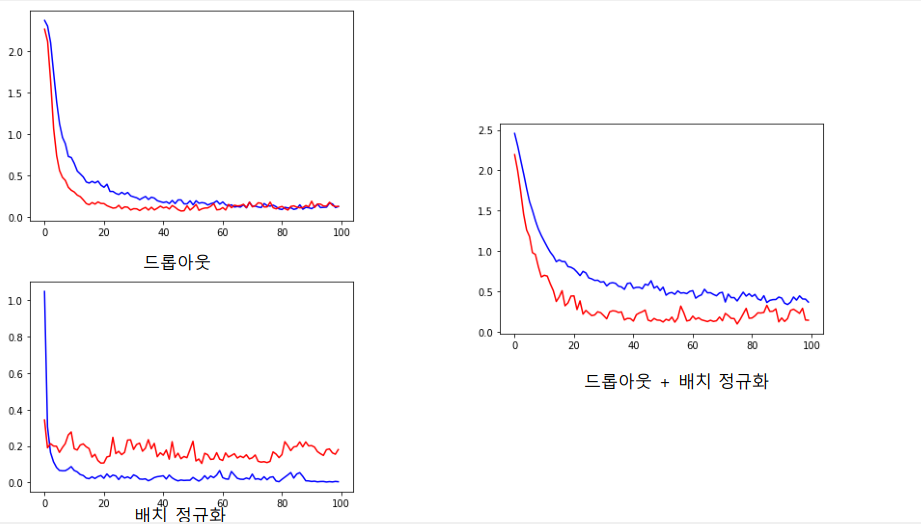

In [ ]:
from IPython.display import Image
Image('캡처.PNG')

### 커스텀 모델

In [ ]:

class CustomLinear(nn.Module):

    def __init__(self,in_features, out_features, bias=True,p=0.5):

        super().__init__()
        self.linear = nn.Linear(in_features,out_features,bias)
        self.relu = nn.ReLU()
        self.drop = nn.Dropout(p)
        #self.bn =nn.BatchNorm1d(200)
        

    def forward(self, x):

        x=self.linear(x)
        x=self.relu(x)
        #x=self.bn(x)
        x=self.drop(x)
        

        return x

mlp = nn.Sequential(
    CustomLinear(64, 200),
    CustomLinear(200, 200),
    CustomLinear(200, 200),
    nn.Linear(200,10))

    


# Reference  
[1] 두세교, "파이토치 첫걸음", 제이펍, 김완섭 역, 2019